TASK-1
SIMPLE LINEAR REGRESSION TASK

PERCENTAGE OF A STUDENT BASED ON STUDY HOURS

AUTHOR: SAVITHA SALUNKE

In [9]:
#Libraries necessary for Analysis

import numpy as npy
import pandas as pd
import os


import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')

import seaborn as sas

import warnings
warnings.filterwarnings("ignore")

In [10]:
#Loading Data

data="http://bit.ly/w-data"
df=pd.read_csv(data)

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


This gives us information on the type of Data we are dealing with. Here we only have 2 attributes. Hours is represented in Float Data Type while the scores are Integers

In [12]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


With this we can conclude the Basic Information about the Data Set i.e. 
The total count
Mean
Standard Deviation
Minimum Hours and Scores
Maximum Hours and Scores

In [13]:
rmv_dup=df.duplicated()
print('No. of Duplicates:'+ str(rmv_dup.sum))

No. of Duplicates:<bound method Series.sum of 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool>


Hence No Duplicates are present in Data Set

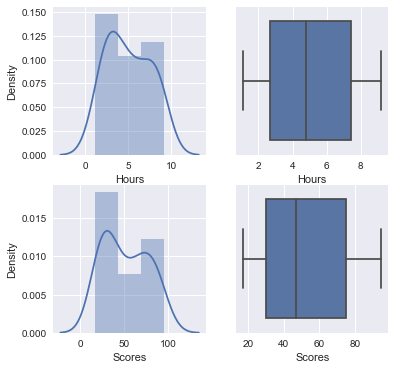

In [14]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(6,6)

a=sas.distplot(df['Hours'], ax=axes[0][0])
a=sas.boxplot(df['Hours'], orient='v',ax=axes[0][1])

a=sas.distplot(df['Scores'], ax=axes[1][0])
a=sas.boxplot(df['Scores'], orient='v',ax=axes[1][1])

plt.show()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

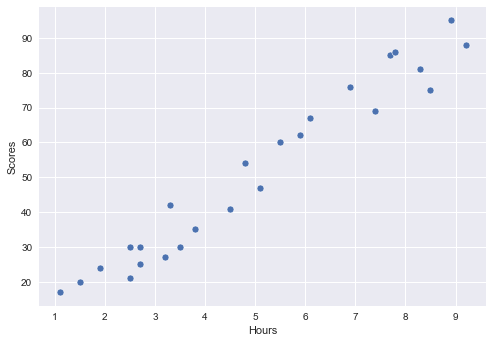

In [15]:
sas.scatterplot(df['Hours'],df['Scores'])

From the Scatter Plot above we can conclude that as Hours(Study Hours) increases so do the Scores(Percentage recieved by students)
Also we can see that there are no outliers.

In [16]:
X=df.drop('Scores', axis=1)
y=df['Scores']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',y_train.shape)
print('test_labels',y_test.shape)

X_train (20, 1)
X_test (5, 1)
train_labels (20,)
test_labels (5,)


In [18]:
from sklearn.linear_model import LinearRegression

regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [20]:
#Accuracy

print('Training set accuracy:', regression_model.score(X_train, y_train))
print('Test set accuracy:', regression_model.score(X_test, y_test))

Training set accuracy: 0.9515510725211552
Test set accuracy: 0.9454906892105356


In [21]:
hours_study=9.5
pred= regression_model.predict([[hours_study]])

print('Number of Study Hours: ',format(hours_study))
print('Score Obtained for corresponding hours of study: ', format(pred[0]))

Number of Study Hours:  9.5
Score Obtained for corresponding hours of study:  96.16939660753593


In [22]:
#Printing the Linear Equation

print('Scores = (', regression_model.coef_[0],'* Hours)+', regression_model.intercept_)

Scores = ( 9.910656480642237 * Hours)+ 2.018160041434683


Thus, we have found the score of a student who studies for 9.5 Hours a Day to be 96.169.
And the data follows the Linear Equation: scores=(9.910656480642237 * Hours)+2.018160041434683